In [1]:
import re
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [2]:
def read_input(filename):
    expr = r'Sensor at x=(-?\d+), y=(-?\d+): closest beacon is at x=(-?\d+), y=(-?\d+)'
    sensors = {}
    with open(filename, 'r') as f:
        for line in f.readlines():
            m = re.search(expr, line)
            s = (int(m[1]), int(m[2]))
            b = (int(m[3]), int(m[4]))
            d = abs(b[0] - s[0]) + abs(b[1] - s[1])
            sensors[s] = (b, d)
    return sensors

def runit(filename):
    sensors = read_input(filename)
    y_line = 2000000
    x_pos = set()
    x_pos_beacon = set()
    for ((sensor_x, sensor_y), ((beacon_x, beacon_y), dist)) in sensors.items():
        dx = dist - abs(sensor_y - y_line)
        x_min = sensor_x - dx
        x_max = sensor_x + dx
        x_pos = x_pos.union(set(range(x_min, x_max + 1)))
        if beacon_y == y_line:
            x_pos_beacon.add(beacon_x)
    return len(x_pos.difference(x_pos_beacon))

def get_sensor_polygons(sensors):
    polygons = []
    for ((sensor_x, sensor_y), ((beacon_x, beacon_y), dist)) in sensors.items():
        polygon = (
            (sensor_x + dist, sensor_x,        sensor_x - dist, sensor_x),
            (sensor_y,        sensor_y - dist, sensor_y,        sensor_y + dist)
        )
        polygons.append(polygon)
    return polygons

def runit2(filename):
    sensors = read_input('15_input.txt')
    polygons = get_sensor_polygons(sensors)
    p = Polygon(list(zip(*polygons[0])))
    for polygon in polygons[1:]:
        p_new = Polygon(list(zip(*polygon)))
        p = p.union(p_new)
    r = Polygon([(0, 0), (4000000, 0), (4000000, 4000000), (0, 4000000)])
    left = r.difference(p)
    x = int(left.bounds[0]) + 1
    y = int(left.bounds[1]) + 1

    fig, ax = plt.subplots(figsize=(10, 10))
    for polygon in polygons:
        ax.fill(*polygon)
    ax.plot(x, y, 'x', color='black', markersize=10)
    ax.set_xlim((0, 4e6))
    ax.set_ylim((0, 4e6))
    ax.text(x, y, f'({x}, {y})', horizontalalignment='right', verticalalignment='bottom')
    return 4000000 * x + y

In [3]:
runit('15_input.txt')

5176944

13350458933732

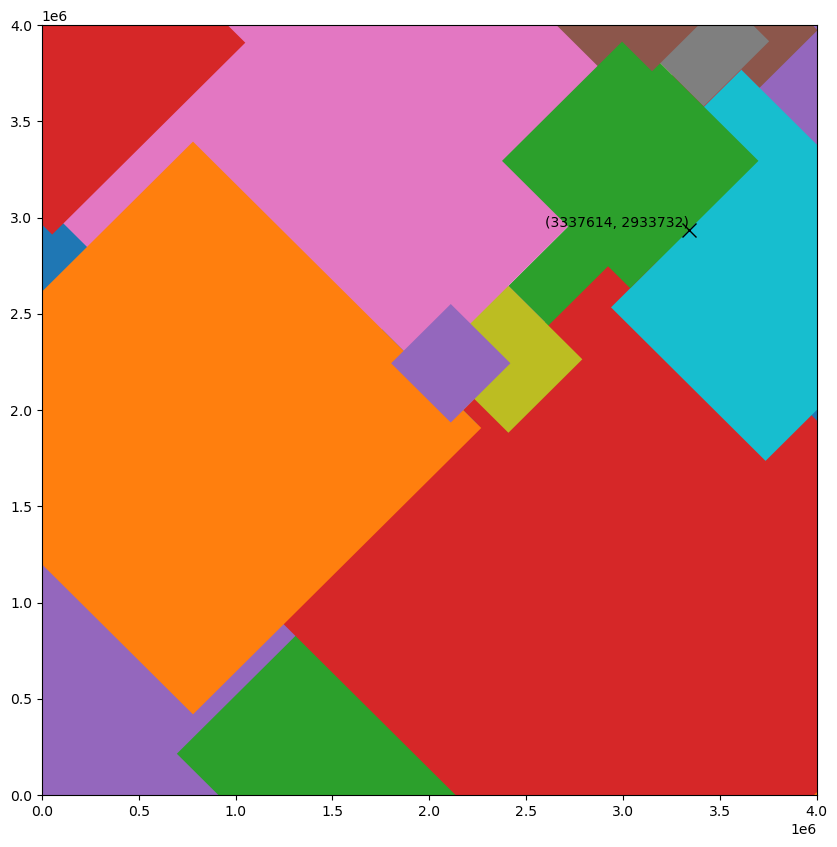

In [4]:
runit2('15_input.txt')